<a href="https://colab.research.google.com/github/FGalvao77/Rede-Neural-Artificial-RNA-para-predizer-valor-de-venda-de-casas/blob/main/Rede_Neural_Artificial_(RNA)_para_predizer_valor_de_venda_de_casas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **_Rede Neural Artificial (RNA)_ para predizer valor de venda de casas**
---

<font size=4.5>**Descrição do problema:**</font>
- criar um modelo de `RNA` para predizer o valor de venda de casas.

E para construção da arquitetura da RNA utilizaremos o [`TensorFlow`](https://www.tensorflow.org/) & [`Keras`](https://keras.io/).

Como base de desenvolvimento de conhecimento, segue o vídeo-aula do _Kaggle Grandmaster_ [Mario Filho](https://www.mariofilho.com/).

Obs.: realizei alguns adaptações/ajustes para deixar um pouco a minha marca pessoal e meu nível de conhecimento em aplicações de [Ciência de Dados](https://pt.wikipedia.org/wiki/Ci%C3%AAncia_de_dados).

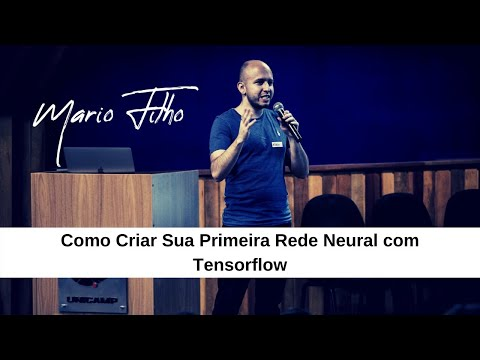

In [84]:
# biblioteca para exibicão do vídeo-aula no ambiente do google colab / jupyter notebook
from IPython.display import YouTubeVideo

# vídeo-aula - Como criar modelos de séries temporais (time series) com PROPHET - Mario Filho
YouTubeVideo('s0s6Q1GLJGo', width=720, height=360)

**Importando o conjunto de dados**
- iremos importar o conjunto de dados direto de uma _url_, nesse caso, do meu repositório pessoal do `GitHub`.

In [1]:
!wget 'https://raw.githubusercontent.com/FGalvao77/datasets/main/housePrices_train.csv'

--2022-03-12 00:00:08--  https://raw.githubusercontent.com/FGalvao77/datasets/main/housePrices_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460676 (450K) [text/plain]
Saving to: ‘housePrices_train.csv’

housePrices_train.c 100%[===================>] 449.88K  --.-KB/s    in 0.02s   

2022-03-12 00:00:08 (21.5 MB/s) - ‘housePrices_train.csv’ saved [460676/460676]



> Esse conjunto de dados originalmente foi baixado do [`Kaggle`](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv).

**Visualizando o diretório principal**

In [2]:
%ls

housePrices_train.csv  sample_data/


**Realizando a leitura do conjunto de dados**

In [3]:
!head housePrices_train.csv

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PCo

**Importando as bibliotecas necessárias**

In [4]:
import pandas as pd                 # para análise e manipulação de dados
import numpy as np                  # para operações matemáticas de alto nível, como matrizes (arrays)
import tensorflow as tf             # para construção do modelo de RNA
import matplotlib.pyplot as plt     # para visualização gráfica
import seaborn as sns               # para visualização gráfica

# para ignorar mensagens de alertas
import warnings
warnings.filterwarnings('ignore')

# configurando o ambiente de exibição do dataframe e dos gráficos
pd.set_option('display.max_columns', 81)
%matplotlib inline
sns.set()

**Instanciando o conjunto de dados na variável `data`**

In [5]:
data = pd.read_csv('housePrices_train.csv')
data.head() # visualizando as 5 primeiras observações

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Informações gerais**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Dimensão do conjunto de dados**

In [7]:
data.shape  # linhas e colunas

(1460, 81)

In [8]:
print(f'O conjunto de dados possui: {data.shape[0]} colunas | {data.shape[1]} linhas.')

O conjunto de dados possui: 1460 colunas | 81 linhas.


**Visualizando a presença de dados nulos**

In [9]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

> Veja que temos valores nulos no conjunto de dados! E iremos tratar desse problema mais a frente.

Podemos também utilizar a função [`.any()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html) no final do código acima.

Essa função "percorre" todo o conjunto de dados e, se encontrado algum valor nulo em uma ou mais observações como resposta teremos um valor boleano.

In [10]:
data.isnull().sum().any()   # True: verdadeiro | False: falso

True

**Estatística descritiva do conjunto de dados**

In [11]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Visualizando as estatísticas somento do atributo alvo**

In [12]:
pd.DataFrame(data['SalePrice'].describe()).T

,count,mean,std,min,25%,50%,75%,max
SalePrice,1460.0,180921.19589,79442.502883,34900.0,129975.0,163000.0,214000.0,755000.0


**Eliminando o atributo `Id` do conjunto de dados**
- o mesmo não agrega nenhum valor ao propósito do modelo.

In [13]:
data = data.drop('Id', axis=1)

**Nome dos atributos presentes no conjunto de dados**

In [14]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

**Instanciando as variáveis explicativas (X) e a resposta (y)**

In [15]:
X = data.drop('SalePrice', axis=1)  # variáveis independentes
y = data['SalePrice']               # variável dependente

**Visualizando as 5 primeiras observações das variáveis X e y**

In [16]:
display(
    X[:5], 
    np.array(y[:5])
)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


array([208500, 181500, 223500, 140000, 250000])

**Importando a função [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) da biblioteca _sklearn_ para realizar o particionamento**
- realizando o particionamento dos dados em **50%** para treino e validação.

In [27]:
from sklearn.model_selection import train_test_split

# instanciando os dados de treino e validação
Xtrain, Xval, ytrain, yval = train_test_split(X, y, train_size=0.5, random_state=42)

**Dimensão dos objetos**

In [28]:
Xtrain.shape, Xval.shape, ytrain.shape, yval.shape  # linhas e colunas

((730, 79), (730, 79), (730,), (730,))

**Visualizando as 5 primeiras observações da variável X**

In [29]:
Xtrain.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1052,60,RL,100.0,9500,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,2Story,6,6,1964,1978,Gable,CompShg,VinylSd,VinylSd,BrkCmn,272.0,TA,TA,CBlock,TA,TA,No,Rec,442,Unf,0,374,816,GasA,TA,Y,SBrkr,1127,850,0,1977,0,1,1,1,4,1,TA,9,Typ,1,TA,Attchd,1964.0,RFn,2,540,TA,TA,Y,0,52,0,0,0,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal
71,20,RL,69.0,7599,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,1Story,4,6,1982,2006,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,565,Unf,0,280,845,GasA,TA,Y,SBrkr,845,0,0,845,1,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1987.0,Unf,2,360,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
94,60,RL,69.0,9337,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,6,5,1997,1997,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,PConc,Gd,TA,No,GLQ,648,Unf,0,176,824,GasA,Ex,Y,SBrkr,905,881,0,1786,1,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,1997.0,RFn,2,684,TA,TA,Y,0,162,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
1440,70,RL,79.0,11526,Pave,NaN,IR1,Bnk,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,2.5Fin,6,7,1922,1994,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,Ex,TA,No,Unf,0,Unf,0,588,588,GasA,Fa,Y,SBrkr,1423,748,384,2555,0,0,2,0,3,1,TA,11,Min1,1,Gd,Detchd,1993.0,Fin,2,672,TA,TA,Y,431,0,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
33,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,1018,Unf,0,380,1398,GasA,Gd,Y,SBrkr,1700,0,0,1700,0,1,1,1,4,1,Gd,6,Typ,1,Gd,Attchd,1959.0,RFn,2,447,TA,TA,Y,0,38,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


**Separando as _variáveis categóricas_ do conjunto de dados**

Utilizaremos a função [`.select_dtypes`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html) do Pandas e passando o argumento "(include=object)" para selecionar somente o tipo de variável de interesse, nesse caso variáveis categóricas ("object").

In [30]:
cat_cols = data.select_dtypes(include='object').columns

# contabilizando a quantidade de variáveis e o nome dos atributos presente no objeto "cat_cols"
len(cat_cols), cat_cols

(43,
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
        'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
        'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
        'SaleType', 'SaleCondition'],
       dtype='object'))

In [31]:
# from sklearn.preprocessing import OneHotEncoder

**Instalando a biblioteca [`category_encoders`](https://contrib.scikit-learn.org/category_encoders/)**
- a biblioteca nos fornece ferramentas para tratar variável categórica.

In [32]:
!pip install category_encoders

**Importando a biblioteca**

In [33]:
# importando a função "OneHotEncoder" da library "category_encoders"
from category_encoders import OneHotEncoder

- https://pypi.org/project/category-encoders/

> E se houver algum interesse no aprofundamento da aplicabilidade da biblioteca, segue o link da documentação:
- https://contrib.scikit-learn.org/category_encoders/index.html

**Realizando o tratamento das variáveis categóricas**
- cada observação recebe uma marcação binária (0 para não | 1 para sim), e todos os atributos são classificado se pertence ou não a uma  distinta observação.

Como argumentos, utilizarei:

- cols: list (o principal argumento)
    - uma lista de colunas para codificar, se None, todas as colunas de string serão codificadas.

- drop_invariant: bool
    - boolean para descartar ou não colunas com variação 0.

- handle_missing: str
as opções são 'error', 'return_nan', 'value' e 'indicator'. O padrão é 'value'.

    - 'error' gerará um ValueError se dados ausentes forem encontrados. 
    - 'return_nan' codificará um valor ausente como np.nan em cada coluna fictícia. 
    - 'value' codificará um valor ausente como 0 em cada coluna fictícia. 
    - 'indicator' tratará a falta como sua própria categoria, adicionando uma coluna fictícia adicional (se há valores ausentes no conjunto de treinamento ou não).

In [34]:
cat_encoder = OneHotEncoder(cols=cat_cols, drop_invariant=True, handle_missing='value')

# realizando o tratamento das variáveis
Xtrain = cat_encoder.fit_transform(Xtrain)
Xval = cat_encoder.transform(Xval)

In [35]:
# visualizando 5 observações aleatórias
Xtrain.sample(5)

,MSSubClass,MSZoning_1,MSZoning_2,MSZoning_3,MSZoning_4,MSZoning_5,LotFrontage,LotArea,Street_1,Street_2,Alley_1,Alley_2,Alley_3,LotShape_1,LotShape_2,LotShape_3,LotShape_4,LandContour_1,LandContour_2,LandContour_3,LandContour_4,Utilities_1,Utilities_2,LotConfig_1,LotConfig_2,LotConfig_3,LotConfig_4,LotConfig_5,LandSlope_1,LandSlope_2,LandSlope_3,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Neighborhood_6,Neighborhood_7,Neighborhood_8,Neighborhood_9,...,GarageCond_5,GarageCond_6,PavedDrive_1,PavedDrive_2,PavedDrive_3,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC_1,PoolQC_2,PoolQC_3,PoolQC_4,Fence_1,Fence_2,Fence_3,Fence_4,Fence_5,MiscFeature_1,MiscFeature_2,MiscFeature_3,MiscVal,MoSold,YrSold,SaleType_1,SaleType_2,SaleType_3,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5,SaleCondition_6
1377,50,1,0,0,0,0,60.0,10998,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,68,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,7,2009,1,0,0,0,0,0,0,0,1,0,0,0,0,0
200,20,0,1,0,0,0,80.0,8546,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,132,64,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,3,2010,1,0,0,0,0,0,0,0,1,0,0,0,0,0
304,75,0,1,0,0,0,87.0,18386,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,302,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,5,2008,1,0,0,0,0,0,0,0,1,0,0,0,0,0
685,160,1,0,0,0,0,NaN,5062,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,219,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,9,2007,1,0,0,0,0,0,0,0,1,0,0,0,0,0
509,20,1,0,0,0,0,80.0,9600,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,224,88,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,7,2009,1,0,0,0,0,0,0,0,1,0,0,0,0,0


**Importando a biblioteca [`SimpleImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) para realizarmos a _imputação_ de valores**

In [36]:
from sklearn.impute import SimpleImputer

In [37]:
# iremos utilizar a estratégia de imputar a média dos valores onde houver valores ausentes
imputer = SimpleImputer(strategy='mean')

# realizando a imputação
Xtrain = imputer.fit_transform(Xtrain)
Xval = imputer.transform(Xval)

In [38]:
# visualizando o resultado
Xtrain

array([[ 60.,   1.,   0., ...,   0.,   0.,   0.],
       [ 20.,   1.,   0., ...,   0.,   0.,   0.],
       [ 60.,   1.,   0., ...,   0.,   0.,   0.],
       ...,
       [ 20.,   1.,   0., ...,   0.,   0.,   0.],
       [ 50.,   1.,   0., ...,   0.,   0.,   0.],
       [120.,   1.,   0., ...,   0.,   0.,   0.]])

**Importando a função [`MaxAbsScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) para _dimensionarmos_ cada recurso por seu valor absoluto máximo**

In [39]:
from sklearn.preprocessing import MaxAbsScaler

In [40]:
scaler_max = MaxAbsScaler()

Xtrain = scaler_max.fit_transform(Xtrain)
Xval = scaler_max.transform(Xval)

In [41]:
# visualizando o resultado
Xtrain

array([[0.31578947, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.10526316, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.31578947, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.10526316, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.26315789, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.63157895, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [42]:
# visualizando o resultado em formato de um "dataframe"
pd.DataFrame(Xtrain)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291
0,0.315789,1.0,0.0,0.0,0.0,0.0,0.319489,0.044136,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.000000,0.095064,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.500000,0.998507,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.105263,1.0,0.0,0.0,0.0,0.0,0.220447,0.035304,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.500000,0.998507,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.315789,1.0,0.0,0.0,0.0,0.0,0.220447,0.043378,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.000000,0.296161,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.416667,0.998507,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.368421,1.0,0.0,0.0,0.0,0.0,0.252396,0.053548,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.502917,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.750000,0.999005,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.105263,1.0,0.0,0.0,0.0,0.0,0.223642,0.049023,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.000000,0.069470,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0.105263,1.0,0.0,0.0,0.0,0.0,0.249201,0.043286,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.000000,0.040219,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.250000,0.998507,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
726,0.263158,1.0,0.0,0.0,0.0,0.0,0.207668,0.036256,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.502917,0.080439,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.000000,0.999502,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
727,0.105263,1.0,0.0,0.0,0.0,0.0,0.191693,0.037966,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.998010,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
728,0.263158,1.0,0.0,0.0,0.0,0.0,0.175719,0.035504,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.000000,0.438757,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.500000,0.998507,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


**Instanciando somente as valores das variáveis _ytrain_ e _yval_**

In [43]:
ytrain = ytrain.values
yval = yval.values

In [48]:
# visualizando os 16 primeiros valores do dados "ytrain"
ytrain[:16]

array([165000, 129500, 204750, 191000, 165500, 173000, 119500, 127500,
       159500, 153900, 129900, 152000, 185000, 127000, 168500, 269790])

In [49]:
# visualizando os 16 primeiros valores do dados "yval"
yval[:16]

array([154500, 325000, 115000, 159000, 315500,  75500, 311500, 146000,
        84500, 135500, 145000, 130000,  81000, 214000, 181000, 134500])

**Importando as funções do Keras para construção da rede neural**

In [86]:
from keras import layers, Model

In [85]:
# criando uma RNA simples

# semente para reprodutibilidade do modelo
tf.random.set_seed(42)

# instanciando as camadas
input = layers.Input((Xtrain.shape[1], ))               # entrada da rede: quantidade de dados 
hidden = layers.Dense(100, activation='relu')(input)    # camada oculta: com 100 neurônios e definindo sua função de ativação
output = layers.Dense(1, activation='linear')(hidden)   # saída da rede: com 1 saída e sua função de ativação

# instanciando o modelo, nesse caso, com nome de "model" e, passando os argumentos de entrada (input) e saída da rede (output)
model = Model(input, output)  

# compilando a rede: definindo a função de perda e seu otimizador  
model.compile(loss='msle', optimizer='adam')
# "loss='msle'": Calcula o erro logarítmico quadrado médio entre y_truee y_pred
# "optimizer='adam'": A otimização de Adam é um método estocástico de gradiente descendente que se baseia na estimativa 
# adaptativa de momentos de primeira e segunda ordem

# sumário geral do modelo
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 292)]             0         
                                                                 
 dense_11 (Dense)            (None, 100)               29300     
                                                                 
 dense_12 (Dense)            (None, 1)                 101       
                                                                 
Total params: 29,401
Trainable params: 29,401
Non-trainable params: 0
_________________________________________________________________


In [89]:
from tensorflow import keras

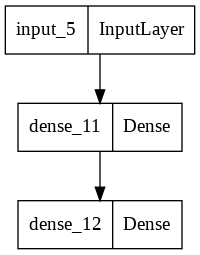

In [91]:
# plotando a estrutura da rede
keras.utils.plot_model(model, 'my_first_model.png')

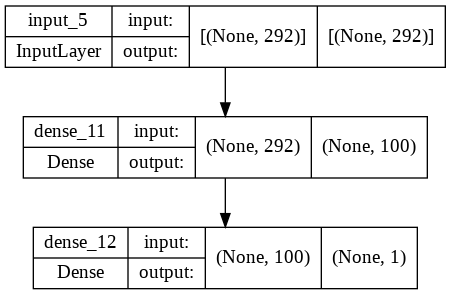

In [92]:
# plotando a estrutura da rede e com seu "shape"
keras.utils.plot_model(model, 'my_first_model_with_shape_info.png', show_shapes=True)

0.0144

**Treinando o modelo**

Definindo os seus argumentos:
- x: dados de entrada;
- y: dados de destino;
- batch_size: inteiro ou None. Número de amostras por atualização de gradiente;
- epochs: inteiro. Número de épocas para treinar o modelo;
- validation_data: Dados sobre os quais avaliar a perda e quaisquer métricas do modelo no final de cada época. O modelo não será treinado com esses dados;
- shuffle: Boleano (para embaralhar os dados de treinamento antes de cada época) ou str (para 'batch')

In [53]:
# treinando o modelo e, definindo os seus argumentos
model.fit(x=Xtrain, y=ytrain, batch_size=1, epochs=100, validation_data=(Xval, yval), shuffle=True)

Epoch 1/100
730/730 [==============================] - 3s 4ms/step - loss: 54.3009 - val_loss: 35.6896
Epoch 2/100
730/730 [==============================] - 3s 3ms/step - loss: 28.9906 - val_loss: 24.5642
Epoch 3/100
730/730 [==============================] - 3s 3ms/step - loss: 21.6869 - val_loss: 19.4583
Epoch 4/100
730/730 [==============================] - 3s 3ms/step - loss: 17.5589 - val_loss: 16.0432
Epoch 5/100
730/730 [==============================] - 2s 3ms/step - loss: 14.5993 - val_loss: 13.4420
Epoch 6/100
730/730 [==============================] - 2s 3ms/step - loss: 12.2649 - val_loss: 11.3272
Epoch 7/100
730/730 [==============================] - 2s 3ms/step - loss: 10.3322 - val_loss: 9.5462
Epoch 8/100
730/730 [==============================] - 3s 3ms/step - loss: 8.6885 - val_loss: 8.0184
Epoch 9/100
730/730 [==============================] - 3s 3ms/step - loss: 7.2724 - val_loss: 6.6961
Epoch 10/100
730/730 [==============================] - 2s 3ms/step - loss: 6.

In [ ]:
# model.fit(Xtrain, ytrain, validation_data=(Xval, yval), epochs=1_000, shuffle=True, batch_size=1)

**Realizando as predições com o modelo nos dados de validação**

In [54]:
pred = model.predict(Xval)

**Importando a função [`mean_squared_log_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html) para calcular a _perda de regressão de erro logarítmico quadrado médio_**

In [55]:
from sklearn.metrics import mean_squared_log_error

In [56]:
# calculando o erro do modelo
np.sqrt(mean_squared_log_error(yval, pred))

0.18630725879019075

**Importando a função [`EarlyStopping`](https://keras.io/api/callbacks/early_stopping/),para quando uma métrica monitorada parar de melhorar o treinamento cessará**

In [57]:
from keras.callbacks import EarlyStopping

In [59]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=5,
    restore_best_weights=True
)

In [93]:
# criando a RNA de DEEP LEARNING com uma segunda camada oculta (hidden_2) e também definindo a função "Dropout"

# semente para reprodutibilidade do modelo
tf.random.set_seed(42)

# instanciando as camadas
input = layers.Input((Xtrain.shape[1], ))                   # entrada da rede: quantidade de dados 

hidden_1 = layers.Dense(100, activation='relu')(input)      # camada 1 oculta: com 100 neurônios e definindo sua função de ativação
drop_1 = layers.Dropout(0.5)(hidden_1)

hidden_2 = layers.Dense(100, activation='relu')(drop_1)   # camada 2 oculta: com 100 neurônios e definindo sua função de ativação
drop_2 = layers.Dropout(0.5)(hidden_2)

output = layers.Dense(1, activation='linear')(drop_2)   # saída da rede: com 1 saída e sua função de ativação

# instanciando o modelo, nesse caso, com nome de "model" e, passando os argumentos de entrada (input) e saída da rede (output)
model = Model(input, output)  
# compilando a rede e definindo a função de perda e seu otimizador                  
model.compile(loss='msle', optimizer='adam')

# sumário geral do modelo
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 292)]             0         
                                                                 
 dense_13 (Dense)            (None, 100)               29300     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                 101       
                                                                 
Total params: 39,501
Trainable params: 39,501
Non-trainable

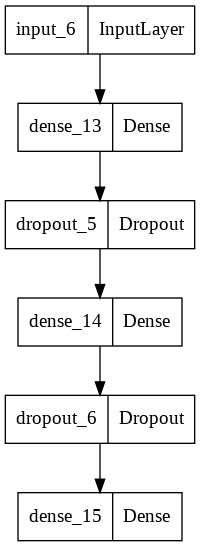

In [94]:
# plotando a estrutura da rede
keras.utils.plot_model(model, 'my_second_model.png')

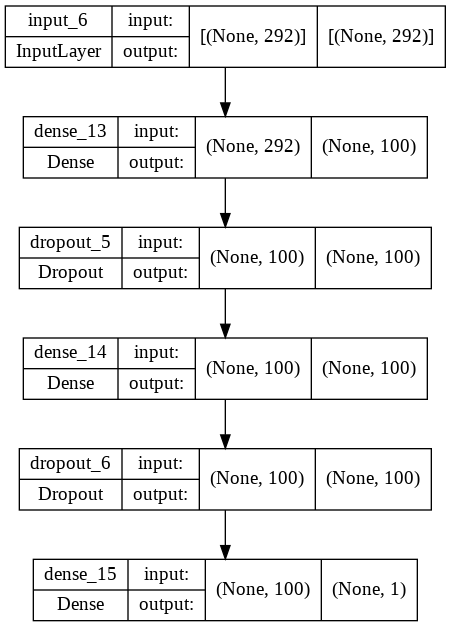

In [95]:
# plotando a estrutura da rede e com seu "shape"
keras.utils.plot_model(model, 'my_second_model_with_shape_info.png', show_shapes=True)

In [61]:
model.fit(x=Xtrain, y=ytrain, batch_size=1, 
          epochs=100, 
          validation_data=(Xval, yval), 
          shuffle=True, 
          callbacks=[early_stopping])

Epoch 1/100
730/730 [==============================] - 3s 4ms/step - loss: 45.7048 - val_loss: 19.4253
Epoch 2/100
730/730 [==============================] - 3s 4ms/step - loss: 13.2279 - val_loss: 8.8033
Epoch 3/100
730/730 [==============================] - 3s 4ms/step - loss: 6.8611 - val_loss: 4.7327
Epoch 4/100
730/730 [==============================] - 3s 4ms/step - loss: 3.7488 - val_loss: 2.5596
Epoch 5/100
730/730 [==============================] - 3s 4ms/step - loss: 1.9951 - val_loss: 1.3066
Epoch 6/100
730/730 [==============================] - 2s 3ms/step - loss: 1.0525 - val_loss: 0.6784
Epoch 7/100
730/730 [==============================] - 3s 4ms/step - loss: 0.6087 - val_loss: 0.3567
Epoch 8/100
730/730 [==============================] - 2s 3ms/step - loss: 0.3505 - val_loss: 0.2070
Epoch 9/100
730/730 [==============================] - 3s 4ms/step - loss: 0.2475 - val_loss: 0.1463
Epoch 10/100
730/730 [==============================] - 3s 4ms/step - loss: 0.2204 - val

In [62]:
pred = model.predict(Xval)

In [63]:
np.sqrt(mean_squared_log_error(yval, pred))

0.16346563032644915

In [64]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [65]:
# definindo os demais "callbacks"

# instanciando a função de parada do modelo
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=0,       
    restore_best_weights=True, 
    mode='auto', 
    verbose=2
)

# instanciando a redução da taxa de aprendizagem do modelo
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    min_delta=0,       
    factor=0.2,
    patience=5,
    min_lr=0,
    verbose=2
)

# criando um objeto com a função importada e definindo o ponto de checagem com o objeto "checkpoint_path"
checkpoint = ModelCheckpoint(
    monitor='val_loss',
    filepath='ann_housePrices.h5',
    save_freq='epoch',
    save_weights_only=True,
    save_best_only=True,
    mode='auto',
    verbose=2
)

In [96]:
# criando a RNA de DEEP LEARNING com três camadas ocultas

# semente para reprodutibilidade do modelo
tf.random.set_seed(42)

# instanciando as camadas
input = layers.Input((Xtrain.shape[1], ))                   # entrada da rede: quantidade de dados 

hidden_1 = layers.Dense(100, activation='relu')(input)      # camada 1 oculta: com 100 neurônios e definindo sua função de ativação
drop_1 = layers.Dropout(0.5)(hidden_1)

hidden_2 = layers.Dense(100, activation='relu')(drop_1)     # camada 2 oculta: com 100 neurônios e definindo sua função de ativação
drop_2 = layers.Dropout(0.5)(hidden_2)

hidden_3 = layers.Dense(100, activation='relu')(drop_2)     # camada 3 oculta: com 100 neurônios e definindo sua função de ativação
drop_3 = layers.Dropout(0.5)(hidden_3)

output = layers.Dense(1, activation='linear')(drop_3)       # saída da rede: com 1 saída e sua função de ativação

# instanciando o modelo, nesse caso, com nome de "model" e, passando os argumentos de entrada (input) e saída da rede (output)
model = Model(input, output)  

# compilando a rede: definindo a função de perda e o otimizador            
model.compile(loss='msle', optimizer='adam')

# sumário geral do modelo
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 292)]             0         
                                                                 
 dense_16 (Dense)            (None, 100)               29300     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_17 (Dense)            (None, 100)               10100     
                                                                 
 dropout_8 (Dropout)         (None, 100)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               10100     
                                                                 
 dropout_9 (Dropout)         (None, 100)               0   

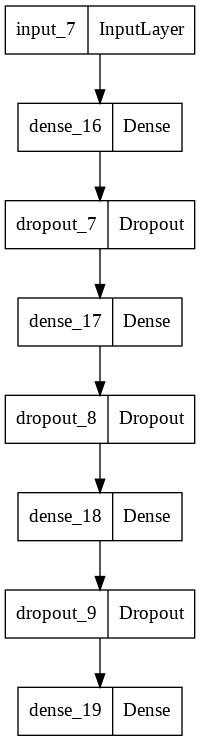

In [98]:
# plotando a estrutura da rede
keras.utils.plot_model(model, 'my_third_model.png')

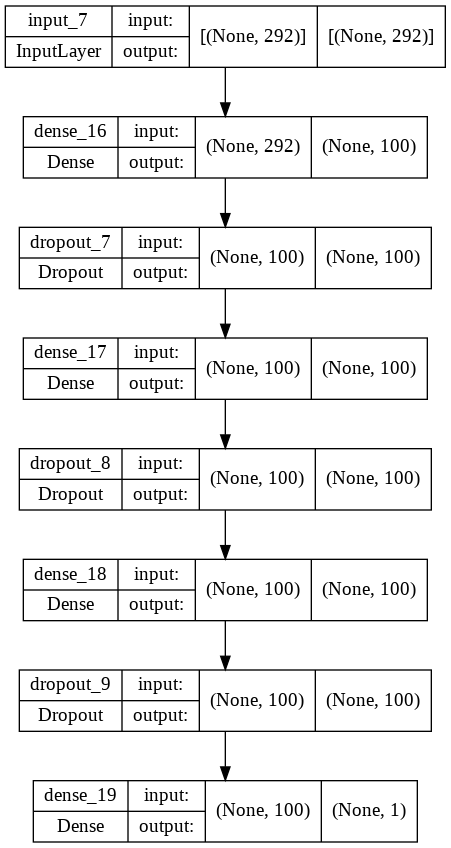

In [97]:
# plotando a estrutura da rede e com seu "shape"
keras.utils.plot_model(model, 'my_third_model_with_shape_info.png', show_shapes=True)

In [67]:
history = model.fit(x=Xtrain, y=ytrain, batch_size=1, epochs=100, validation_data=(Xval, yval), 
                    verbose=2, shuffle=True, callbacks=[early_stopping, reduce_lr, checkpoint])

Epoch 1/100

Epoch 1: val_loss improved from inf to 7.19713, saving model to ann_housePrices.h5
730/730 - 3s - loss: 35.9537 - val_loss: 7.1971 - lr: 0.0010 - 3s/epoch - 4ms/step
Epoch 2/100

Epoch 2: val_loss improved from 7.19713 to 0.92023, saving model to ann_housePrices.h5
730/730 - 2s - loss: 3.2907 - val_loss: 0.9202 - lr: 0.0010 - 2s/epoch - 3ms/step
Epoch 3/100

Epoch 3: val_loss improved from 0.92023 to 0.17393, saving model to ann_housePrices.h5
730/730 - 2s - loss: 0.6119 - val_loss: 0.1739 - lr: 0.0010 - 2s/epoch - 3ms/step
Epoch 4/100

Epoch 4: val_loss improved from 0.17393 to 0.12173, saving model to ann_housePrices.h5
730/730 - 2s - loss: 0.3018 - val_loss: 0.1217 - lr: 0.0010 - 2s/epoch - 3ms/step
Epoch 5/100

Epoch 5: val_loss improved from 0.12173 to 0.11399, saving model to ann_housePrices.h5
730/730 - 2s - loss: 0.2496 - val_loss: 0.1140 - lr: 0.0010 - 2s/epoch - 3ms/step
Epoch 6/100

Epoch 6: val_loss improved from 0.11399 to 0.10498, saving model to ann_housePri

In [68]:
pred = model.predict(Xval)

In [69]:
np.sqrt(mean_squared_log_error(yval, pred))

0.15737302233019232

In [70]:
pred[:10]

array([[136356.83 ],
       [315369.4  ],
       [101394.89 ],
       [160637.34 ],
       [335165.78 ],
       [ 84588.16 ],
       [224126.89 ],
       [136552.84 ],
       [ 79671.74 ],
       [127691.805]], dtype=float32)

In [71]:
yval[:10]

array([154500, 325000, 115000, 159000, 315500,  75500, 311500, 146000,
        84500, 135500])

In [72]:
model.evaluate(Xtrain, ytrain, verbose=2)

23/23 - 0s - loss: 0.0160 - 155ms/epoch - 7ms/step


0.016021771356463432

In [76]:
model.evaluate(Xval, yval, verbose=0)

0.024766266345977783

In [77]:
loss = model.evaluate(Xval, yval, verbose=2)

23/23 - 0s - loss: 0.0248 - 62ms/epoch - 3ms/step


In [78]:
print(loss)

0.024766266345977783


In [79]:
history.history.keys()

dict_keys(['loss', 'val_loss', 'lr'])

In [81]:
# função para plotagem de gráficos
def plot_performace(history, metric1='loss', metric2='lr'):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18,14))

    ax1.plot(history.history[metric1])
    ax1.plot(history.history['val_' + metric1])
    ax1.set_title('\nTraining & Validation - ' + metric1)
    ax1.set_ylabel('loss')
    ax1.set_xlabel('epochs')
    ax1.legend(['train_' + metric1, 
                'val_' + metric1])
    
    ax2.plot(history.history[metric2])
    ax2.plot(history.history[metric2])
    ax2.set_title('\nTraining & Validation - ' + metric2)
    ax2.set_ylabel('lr')
    ax2.set_xlabel('epochs')
    ax2.legend(['train_' + metric2, 
                'val_' + metric2])

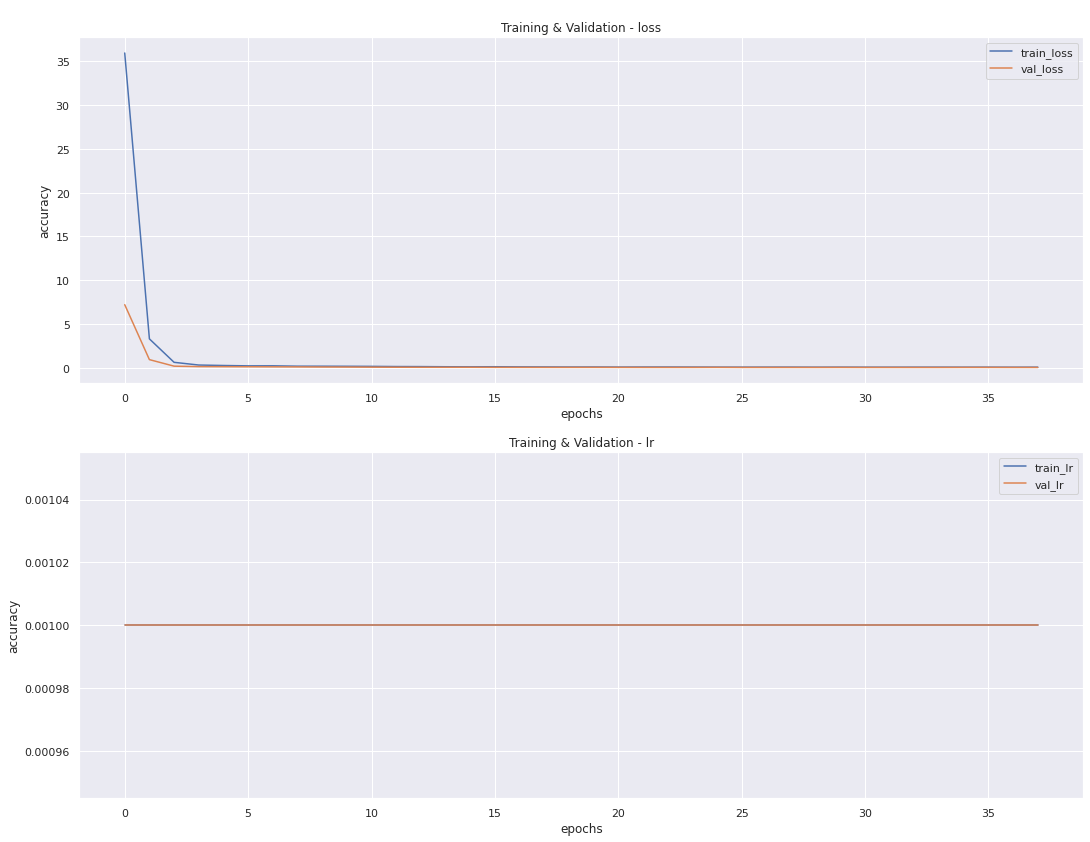

In [ ]:
# plotando os gráficos
plot_performace(history)

In [82]:
!pip install session_info

     |████████████████████████████████| 63 kB 1.7 MB/s 
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8048 sha256=f02587b3e2efc000b69c06ca0679d3bb84ec40dc4eaa18ecab0979cab73f926f
  Stored in directory: /root/.cache/pip/wheels/bd/ad/14/6a42359351a18337a8683854cfbba99dd782271f2d1767f87f
Successfully built session-info


In [83]:
# importando a biblioteca
import session_info

# visualizando as versões das bibliotecas e/ou funções utilizadas no notebook
session_info.show(html=False)

-----
category_encoders   2.4.0
keras               2.8.0
matplotlib          3.2.2
numpy               1.21.5
pandas              1.3.5
seaborn             0.11.2
session_info        1.0.0
sklearn             1.0.2
tensorflow          2.8.0
-----
IPython             5.5.0
jupyter_client      5.3.5
jupyter_core        4.9.2
notebook            5.3.1
-----
Python 3.7.12 (default, Jan 15 2022, 18:48:18) [GCC 7.5.0]
Linux-5.4.144+-x86_64-with-Ubuntu-18.04-bionic
-----
Session information updated at 2022-03-12 00:36
